In [1]:
import pandas as pd
import numpy as np
import sys
import time  # Optional, for demonstration purposes

# Define data types for efficient memory usage
dtype_dict = {
    "OrdCat": "object",  # Set categorical columns as object
}

# Define chunk size (adjust based on memory availability)
chunk_size = 250000
know_df_size = "13,184,290"  # This is just a label for display

# Track the number of processed rows and store chunks
processed_rows = 0
chunks = []

# Process CSV in chunks
for chunk in pd.read_csv("data/Allstate_data.csv", dtype=dtype_dict, chunksize=chunk_size, low_memory=False):
    # Replace '?' with NaN for proper missing value handling
    chunk.replace("?", np.nan, inplace=True)
    
    # Update the processed rows counter
    processed_rows += len(chunk)
    
    # Append this chunk to the list
    chunks.append(chunk)
    
    # Print the progress on the same line
    sys.stdout.write(f"\rProcessed {processed_rows:,} rows out of {know_df_size} ...")
    sys.stdout.flush()

# New line after finishing
print()

# Combine all chunks into a full DataFrame (if needed)
df = pd.concat(chunks, ignore_index=True)

# Check the final DataFrame shape
print("Final Data Shape:", df.shape)


Processed 13,184,290 rows out of 13,184,290 ...
Final Data Shape: (13184290, 35)


In [2]:
#Print info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184290 entries, 0 to 13184289
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Row_ID          int64  
 1   Household_ID    int64  
 2   Vehicle         int64  
 3   Calendar_Year   int64  
 4   Model_Year      int64  
 5   Blind_Make      object 
 6   Blind_Model     object 
 7   Blind_Submodel  object 
 8   Cat1            object 
 9   Cat2            object 
 10  Cat3            object 
 11  Cat4            object 
 12  Cat5            object 
 13  Cat6            object 
 14  Cat7            object 
 15  Cat8            object 
 16  Cat9            object 
 17  Cat10           object 
 18  Cat11           object 
 19  Cat12           object 
 20  OrdCat          object 
 21  Var1            float64
 22  Var2            float64
 23  Var3            float64
 24  Var4            float64
 25  Var5            float64
 26  Var6            float64
 27  Var7            float64
 28  Var8      

In [3]:
# Drop columns Row_ID and Household_ID
df.drop(columns=["Row_ID", "Household_ID"], inplace=True)

df["Claim_Binary"] = (df["Claim_Amount"] > 0).astype(int)

In [4]:
categorical_cols = [
    'Blind_Make','Blind_Model','Blind_Submodel',
    'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 
    'Cat9', 'Cat10', 'Cat11', 'Cat12', 'NVCat', 'OrdCat'  # Exclude high-cardinality ones like Blind_Make
]

df[categorical_cols] = df[categorical_cols].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184290 entries, 0 to 13184289
Data columns (total 34 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Vehicle         int64   
 1   Calendar_Year   int64   
 2   Model_Year      int64   
 3   Blind_Make      category
 4   Blind_Model     category
 5   Blind_Submodel  category
 6   Cat1            category
 7   Cat2            category
 8   Cat3            category
 9   Cat4            category
 10  Cat5            category
 11  Cat6            category
 12  Cat7            category
 13  Cat8            category
 14  Cat9            category
 15  Cat10           category
 16  Cat11           category
 17  Cat12           category
 18  OrdCat          category
 19  Var1            float64 
 20  Var2            float64 
 21  Var3            float64 
 22  Var4            float64 
 23  Var5            float64 
 24  Var6            float64 
 25  Var7            float64 
 26  Var8            float64 
 27  NVCat     

In [5]:
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat', 'NVCat']


In [6]:
# One-hot encode ONLY categorical columns
# One-hot encode only the categorical columns; continuous columns remain unchanged.
df_cat_encoded = pd.get_dummies(
    df[categorical_columns],
    sparse=True,
    dtype='uint8'
)

print(f"Encoded shape: {df_cat_encoded.shape}")
print(f"Memory usage: {df_cat_encoded.memory_usage(deep=True).sum() / 1e9:.2f} GB")

Encoded shape: (13184290, 4191)
Memory usage: 1.00 GB


In [7]:
# Identify categorical columns (assuming they are already defined)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Identify continuous (numerical) columns (excluding categorical columns)
continuous_columns = [col for col in df.columns if col not in categorical_columns]

# Remove "Claim_Amount" and "Claim_Binary" from continuous_columns list
continuous_columns = [col for col in continuous_columns if col not in ["Claim_Amount", "Claim_Binary"]]


print("Continuous columns:", continuous_columns)

df_cont = df[continuous_columns]

# Check the processed DataFrame
print(df_cont.info())  # Verify data types
print(df_cont.head())  # Verify values

Continuous columns: ['Vehicle', 'Calendar_Year', 'Model_Year', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184290 entries, 0 to 13184289
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Vehicle        int64  
 1   Calendar_Year  int64  
 2   Model_Year     int64  
 3   Var1           float64
 4   Var2           float64
 5   Var3           float64
 6   Var4           float64
 7   Var5           float64
 8   Var6           float64
 9   Var7           float64
 10  Var8           float64
 11  NVVar1         float64
 12  NVVar2         float64
 13  NVVar3         float64
 14  NVVar4         float64
dtypes: float64(12), int64(3)
memory usage: 1.5 GB
None
   Vehicle  Calendar_Year  Model_Year      Var1      Var2      Var3      Var4  \
0        3           2005        2005  1.270533  0.999418  0.588154  0.908351   
1        2           200

In [8]:
import scipy.sparse as sp
from scipy.sparse import hstack

# Convert the sparse DataFrame (from one-hot encoding) to a SciPy sparse matrix.
X_cat_sparse = df_cat_encoded.sparse.to_coo()

# Convert continuous (dense) features to a NumPy array.
X_cont_dense = df_cont.values

# Combine horizontally: first the dense columns, then the sparse one-hot encoded columns.
# Note: hstack can combine a dense NumPy array with a sparse matrix.
X_combined = hstack([X_cont_dense, X_cat_sparse], format='csr')


In [9]:
# Extract the target; if it's a column in df, for example:
y = df["Claim_Binary"]

In [10]:
from sklearn.model_selection import train_test_split

# Assuming X_combined is your combined sparse matrix (from hstack) and y is your target Series/array.
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, stratify=y
)

# Check the shapes to verify the split:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train shape: (10547432, 4206)
X_test shape: (2636858, 4206)
y_train length: 10547432
y_test length: 2636858


In [11]:
import lightgbm as lgb
import time

# Define LightGBM Parameters
params_with_efb = {
    'objective': 'binary',
    'metric': 'auc',
    'verbose': 1,
    'data_sample_strategy': 'goss',
    'top_rate': 0.05,   # Alpha: Retain top 5% highest gradients
    'other_rate': 0.05,  # Beta: Sample 5% of smaller gradients
    'max_bin': 64,  # Controls feature binning
    #'max_conflict_rate': 0.8,  # Adjust conflict tolerance
    #'force_col_wise': True,  # Force column-wise histogram (can help bundling)
    'force_row_wise': True
}

# Create LightGBM Datasets
train_data_with_efb = lgb.Dataset(X_train, y_train,  params={'enable_bundle': True,  'max_bin': 64})
valid_data_with_efb = lgb.Dataset(X_test, y_test, params={'enable_bundle': True, 'max_bin': 64})

print("Training LightGBM Model with EFB Enabled...")
start_time_with_efb = time.time()

# Dictionary to store evaluation results
evals_result_with_efb = {}

# Train the model with EFB
model_with_efb = lgb.train(
    params_with_efb,
    train_data_with_efb,
    valid_sets=[valid_data_with_efb],
    valid_names=['validation'],
    num_boost_round=1000,
    callbacks=[
        lgb.record_evaluation(evals_result_with_efb),
        lgb.early_stopping(stopping_rounds=20, verbose=True)
    ]
)

training_time_with_efb = time.time() - start_time_with_efb
best_iter_with_efb = model_with_efb.best_iteration

print(f"\nLightGBM Model with EFB Enabled Training Complete. Best Iteration: {best_iter_with_efb}")
print(f"Training Time: {training_time_with_efb:.4f} seconds")

Training LightGBM Model with EFB Enabled...
[LightGBM] [Info] Number of positive: 76484, number of negative: 10470948
[LightGBM] [Info] Total Bins 7502
[LightGBM] [Info] Number of data points in the train set: 10547432, number of used features: 3453
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007251 -> initscore=-4.919278
[LightGBM] [Info] Start training from score -4.919278
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	validation's auc: 0.611794

LightGBM Model with EFB Enabled Training Complete. Best Iteration: 61
Training Time: 55.8594 seconds


In [12]:
# Define LightGBM Parameters (EFB Disabled)
params_without_efb = {
    'objective': 'binary',
    'metric': 'auc',
    'verbose': 1,
}

# Create LightGBM Datasets
train_data_without_efb = lgb.Dataset(X_train, y_train, params={'enable_bundle': False})
valid_data_without_efb = lgb.Dataset(X_test, y_test, params={'enable_bundle': False})

print("Training LightGBM Model with EFB Disabled...")
start_time_without_efb = time.time()

# Dictionary to store evaluation results
evals_result_without_efb = {}

# Train the model without EFB
model_without_efb = lgb.train(
    params_without_efb,
    train_data_without_efb,
    valid_sets=[valid_data_without_efb],
    valid_names=['validation'],
    num_boost_round=1000,
    callbacks=[
        lgb.record_evaluation(evals_result_without_efb),
        lgb.early_stopping(stopping_rounds=20, verbose=True)
    ]
)

training_time_without_efb = time.time() - start_time_without_efb
best_iter_without_efb = model_without_efb.best_iteration

print(f"\nLightGBM Model with EFB Disabled Training Complete. Best Iteration: {best_iter_without_efb}")
print(f"Training Time: {training_time_without_efb:.4f} seconds")

Training LightGBM Model with EFB Disabled...
[LightGBM] [Info] Number of positive: 76484, number of negative: 10470948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 10.479888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8867
[LightGBM] [Info] Number of data points in the train set: 10547432, number of used features: 3453
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007251 -> initscore=-4.919278
[LightGBM] [Info] Start training from score -4.919278
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[111]	validation's auc: 0.611869

LightGBM Model with EFB Disabled Training Complete. Best Iteration: 111
Training Time: 254.0102 seconds


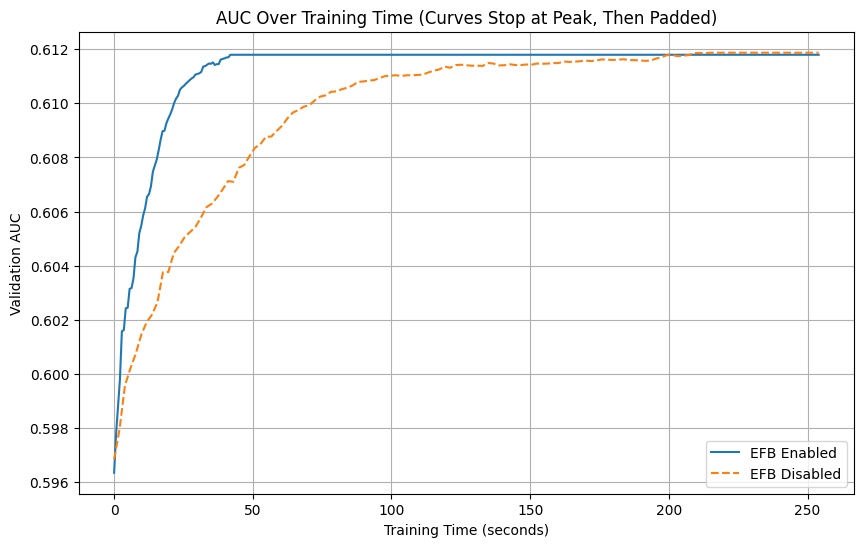

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these variables are already defined:
#   - evals_result_with_efb, evals_result_without_efb
#   - training_time_with_efb, training_time_without_efb

# Extract AUC values and generate original time arrays (one per iteration)
auc_with_efb = np.array(evals_result_with_efb['validation']['auc'])
auc_without_efb = np.array(evals_result_without_efb['validation']['auc'])

time_with_efb = np.linspace(0, training_time_with_efb, len(auc_with_efb))
time_without_efb = np.linspace(0, training_time_without_efb, len(auc_without_efb))

# Identify the peak (best) AUC index and its corresponding time for each model
peak_idx_with = np.argmax(auc_with_efb)
peak_idx_without = np.argmax(auc_without_efb)

peak_time_with = time_with_efb[peak_idx_with]
peak_time_without = time_without_efb[peak_idx_without]

peak_auc_with = auc_with_efb[peak_idx_with]
peak_auc_without = auc_without_efb[peak_idx_without]

# Determine the longest total training time among the two models
max_time = max(training_time_with_efb, training_time_without_efb)

# Define a function to extend a curve to the max_time with a constant value
def extend_curve(time_array, auc_array, peak_time, peak_auc, max_time, num_points=10):
    # Keep points up to (and including) the peak
    time_up_to_peak = time_array[time_array <= peak_time]
    auc_up_to_peak = auc_array[:len(time_up_to_peak)]
    
    # Only add padding if the peak time is less than max_time
    if peak_time < max_time:
        # Create additional time points from the peak to max_time.
        # We use num_points (minus 1 to avoid duplicating the peak_time) extra points.
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_auc = np.full_like(extra_time, peak_auc)
        
        # Concatenate the original (up-to-peak) values with the padded extra points
        extended_time = np.concatenate([time_up_to_peak, extra_time])
        extended_auc = np.concatenate([auc_up_to_peak, extra_auc])
    else:
        extended_time = time_up_to_peak
        extended_auc = auc_up_to_peak
    
    return extended_time, extended_auc

# Extend both curves so that they run until max_time using the constant peak value thereafter
ext_time_with, ext_auc_with = extend_curve(time_with_efb, auc_with_efb, peak_time_with, peak_auc_with, max_time)
ext_time_without, ext_auc_without = extend_curve(time_without_efb, auc_without_efb, peak_time_without, peak_auc_without, max_time)

# Now plot both curves
plt.figure(figsize=(10, 6))
plt.plot(ext_time_with, ext_auc_with, label='EFB Enabled', linestyle='-')
plt.plot(ext_time_without, ext_auc_without, label='EFB Disabled', linestyle='--')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation AUC")
plt.title("AUC Over Training Time (Curves Stop at Peak, Then Padded)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import xgboost as xgb
import time  # ensure you have imported time

# For histogram splitting
params_xgb_hist = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 1,
    'tree_method': 'hist'  # Use histogram-based splitting
}


# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

print("Training XGBoost Model Histogram...")
start_time_xgb = time.time()

# Dictionary to store evaluation results
evals_result_xgb_hist = {}

# Train the model
model_xgb = xgb.train(
    params_xgb_hist,
    dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=20,
    evals_result=evals_result_xgb_hist,
    verbose_eval=True
)

training_time_xgb = time.time() - start_time_xgb
best_iter_xgb = model_xgb.best_iteration

print(f"\nXGBoost Model Training Complete. Best Iteration: {best_iter_xgb}")
print(f"Training Time: {training_time_xgb:.4f} seconds")

Training XGBoost Model Histogram...
[0]	validation-auc:0.59715
[1]	validation-auc:0.59759
[2]	validation-auc:0.59821
[3]	validation-auc:0.59869
[4]	validation-auc:0.59899
[5]	validation-auc:0.59956
[6]	validation-auc:0.60064
[7]	validation-auc:0.60185
[8]	validation-auc:0.60181
[9]	validation-auc:0.60265
[10]	validation-auc:0.60360
[11]	validation-auc:0.60364
[12]	validation-auc:0.60412
[13]	validation-auc:0.60531
[14]	validation-auc:0.60556
[15]	validation-auc:0.60592
[16]	validation-auc:0.60667
[17]	validation-auc:0.60753
[18]	validation-auc:0.60756
[19]	validation-auc:0.60831
[20]	validation-auc:0.60845
[21]	validation-auc:0.60857
[22]	validation-auc:0.60895
[23]	validation-auc:0.60925
[24]	validation-auc:0.60959
[25]	validation-auc:0.60964
[26]	validation-auc:0.60963
[27]	validation-auc:0.60963
[28]	validation-auc:0.60959
[29]	validation-auc:0.60985
[30]	validation-auc:0.61040
[31]	validation-auc:0.61044
[32]	validation-auc:0.61061
[33]	validation-auc:0.61053
[34]	validation-auc:0.

In [17]:
# Alternatively, for exact splitting
params_xgb_exact = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 1,
    'tree_method': 'exact'  # Use exact splitting
}

print("Training XGBoost Model Exact...")
start_time_xgb_exact = time.time()

# Dictionary to store evaluation results
evals_result_xgb_exact = {}

# Train the model
model_xgb_exact = xgb.train(
    params_xgb_exact,
    dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=10,
    evals_result=evals_result_xgb_exact,
    verbose_eval=True
)

training_time_xgb_exact = time.time() - start_time_xgb_exact
best_iter_xgb_exact = model_xgb_exact.best_iteration

print(f"\nXGBoost Model Training Complete. Best Iteration: {best_iter_xgb_exact}")
print(f"Training Time: {training_time_xgb_exact:.4f} seconds")

Training XGBoost Model Exact...
[0]	validation-auc:0.59710
[1]	validation-auc:0.59749
[2]	validation-auc:0.59812
[3]	validation-auc:0.59869
[4]	validation-auc:0.59884
[5]	validation-auc:0.59988
[6]	validation-auc:0.60090
[7]	validation-auc:0.60197
[8]	validation-auc:0.60196
[9]	validation-auc:0.60292
[10]	validation-auc:0.60373
[11]	validation-auc:0.60405
[12]	validation-auc:0.60486
[13]	validation-auc:0.60536
[14]	validation-auc:0.60603
[15]	validation-auc:0.60649
[16]	validation-auc:0.60697
[17]	validation-auc:0.60718
[18]	validation-auc:0.60815
[19]	validation-auc:0.60850
[20]	validation-auc:0.60862
[21]	validation-auc:0.60887
[22]	validation-auc:0.60906
[23]	validation-auc:0.60922
[24]	validation-auc:0.60948
[25]	validation-auc:0.60962
[26]	validation-auc:0.60971
[27]	validation-auc:0.60974
[28]	validation-auc:0.60989
[29]	validation-auc:0.60991
[30]	validation-auc:0.60996
[31]	validation-auc:0.60992
[32]	validation-auc:0.60997
[33]	validation-auc:0.60994
[34]	validation-auc:0.6099

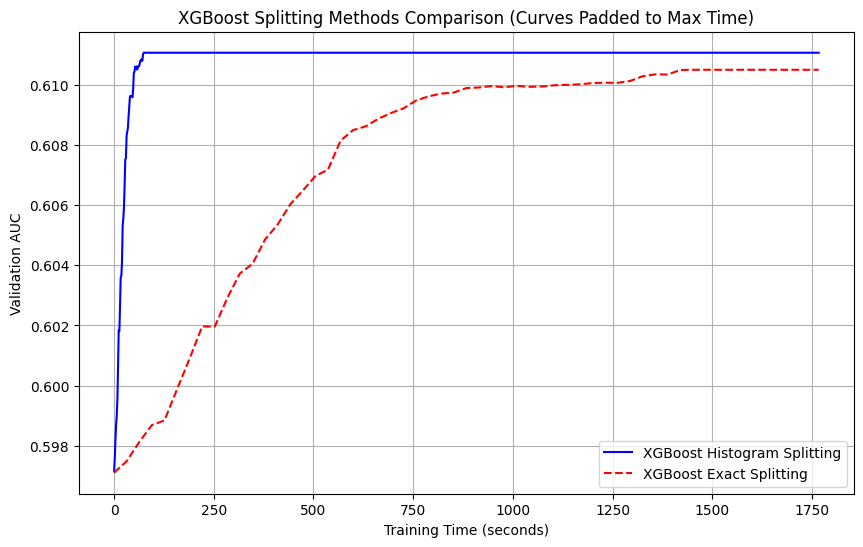

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# --- XGBoost Histogram Splitting ---
# Extract AUC values and generate time stamps for histogram splitting model
auc_hist = np.array(evals_result_xgb_hist['validation']['auc'])
time_per_iter_hist = np.linspace(0, training_time_xgb, len(auc_hist))

# --- XGBoost Exact Splitting ---
# Extract AUC values and generate time stamps for exact splitting model
auc_exact = np.array(evals_result_xgb_exact['validation']['auc'])
time_per_iter_exact = np.linspace(0, training_time_xgb_exact, len(auc_exact))

# Determine the maximum training time between the two models
max_time = max(training_time_xgb, training_time_xgb_exact)

def extend_curve(time_array, auc_array, max_time, num_points=10):
    """
    Extends a learning curve to max_time by padding with a flat line at the peak AUC.
    
    Parameters:
      - time_array: Array of time stamps per iteration.
      - auc_array: Array of AUC values.
      - max_time: The time value to which the curve should be extended.
      - num_points: Number of additional points for the padded segment.
      
    Returns:
      - extended_time: The extended time array.
      - extended_auc: The extended AUC array.
    """
    # Find the index and values at the peak AUC
    peak_index = np.argmax(auc_array)
    peak_time = time_array[peak_index]
    peak_auc = auc_array[peak_index]
    
    # Retain data up to (and including) the peak
    time_up_to_peak = time_array[:peak_index+1]
    auc_up_to_peak = auc_array[:peak_index+1]
    
    # If the peak is reached before max_time, create padding with constant AUC
    if peak_time < max_time:
        # Create additional time points from the peak time to max_time
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_auc = np.full_like(extra_time, peak_auc)
        
        # Concatenate the original curve (up to the peak) with the padding points
        extended_time = np.concatenate([time_up_to_peak, extra_time])
        extended_auc = np.concatenate([auc_up_to_peak, extra_auc])
    else:
        extended_time = time_up_to_peak
        extended_auc = auc_up_to_peak
        
    return extended_time, extended_auc

# Extend the curves for both models
ext_time_hist, ext_auc_hist = extend_curve(time_per_iter_hist, auc_hist, max_time)
ext_time_exact, ext_auc_exact = extend_curve(time_per_iter_exact, auc_exact, max_time)

# --- Combined Plot ---
plt.figure(figsize=(10, 6))
plt.plot(ext_time_hist, ext_auc_hist, label='XGBoost Histogram Splitting', color='blue', linestyle='-')
plt.plot(ext_time_exact, ext_auc_exact, label='XGBoost Exact Splitting', color='red', linestyle='--')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation AUC")
plt.title("XGBoost Splitting Methods Comparison (Curves Padded to Max Time)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
%matplotlib inline


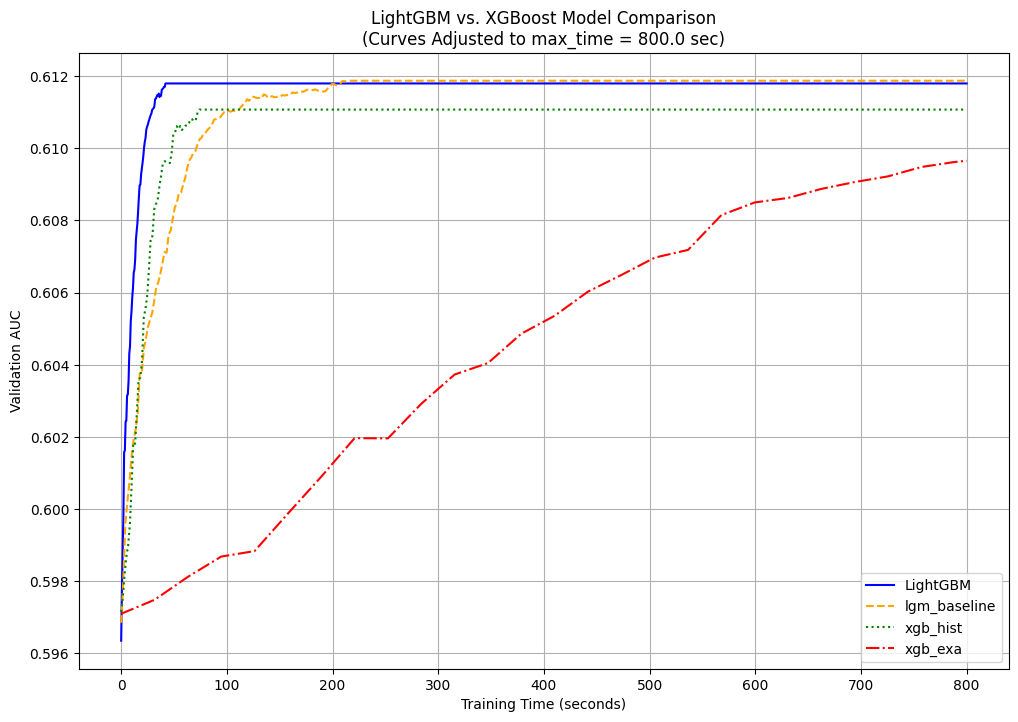

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# --- Modified Helper Function to Extend or Clip the Curve ---
def extend_or_clip_curve(time_array, auc_array, max_time, num_points=10):
    """
    Adjusts a learning curve so that it spans exactly up to max_time.
    
    If the peak AUC occurs before max_time, the curve is extended by padding with a flat line 
    at the peak AUC until max_time.
    If the peak occurs after max_time, the curve is truncated (and interpolated) at max_time.
    
    Parameters:
      - time_array: Array of time stamps for each iteration.
      - auc_array: Array of AUC values.
      - max_time: The time value to which the curve should be extended/truncated.
      - num_points: Number of extra points to use for padding (only when extending).
      
    Returns:
      - adjusted_time: The adjusted time array (up to max_time).
      - adjusted_auc: The adjusted AUC array.
    """
    peak_index = np.argmax(auc_array)
    peak_time = time_array[peak_index]
    peak_auc = auc_array[peak_index]
    
    if peak_time < max_time:
        # Extend the curve to max_time by padding with a flat line at peak_auc.
        time_up_to_peak = time_array[:peak_index+1]
        auc_up_to_peak = auc_array[:peak_index+1]
        extra_time = np.linspace(peak_time, max_time, num_points, endpoint=True)[1:]
        extra_auc = np.full_like(extra_time, peak_auc)
        adjusted_time = np.concatenate([time_up_to_peak, extra_time])
        adjusted_auc = np.concatenate([auc_up_to_peak, extra_auc])
    else:
        # The peak occurs after max_time, so clip the curve.
        # Find indices where time is less than or equal to max_time.
        valid_idx = np.where(time_array <= max_time)[0]
        if valid_idx.size == 0:
            # If no point is before max_time, then simply interpolate between first two points.
            adjusted_time = np.array([max_time])
            adjusted_auc = np.interp(max_time, time_array[:2], auc_array[:2])
        else:
            last_valid = valid_idx[-1]
            adjusted_time = time_array[:last_valid+1].copy()
            adjusted_auc = auc_array[:last_valid+1].copy()
            # If the last valid time isn't exactly max_time, interpolate an extra point.
            if adjusted_time[-1] < max_time:
                interp_auc = np.interp(max_time, time_array[last_valid:last_valid+2], auc_array[last_valid:last_valid+2])
                adjusted_time = np.concatenate([adjusted_time, [max_time]])
                adjusted_auc = np.concatenate([adjusted_auc, [interp_auc]])
    return adjusted_time, adjusted_auc

# --- Use your actual data (no synthetic data is created) ---
# Extract AUC values and generate time stamps for LightGBM (EFB Enabled and Disabled)
auc_with_efb = np.array(evals_result_with_efb['validation']['auc'])
auc_without_efb = np.array(evals_result_without_efb['validation']['auc'])
time_with_efb = np.linspace(0, training_time_with_efb, len(auc_with_efb))
time_without_efb = np.linspace(0, training_time_without_efb, len(auc_without_efb))

# Extract AUC values and generate time stamps for XGBoost Histogram and Exact Splitting models
auc_hist = np.array(evals_result_xgb_hist['validation']['auc'])
time_hist = np.linspace(0, training_time_xgb, len(auc_hist))
auc_exact = np.array(evals_result_xgb_exact['validation']['auc'])
time_exact = np.linspace(0, training_time_xgb_exact, len(auc_exact))

# --- Manual Control for Maximum Time ---
# Set the maximum time for curve adjustment. For example, to display curves only up to 30 seconds:
manual_max_time = 800  # Adjust this value as needed

# Adjust curves for each model using the new helper function.
ext_time_with_efb, ext_auc_with_efb = extend_or_clip_curve(time_with_efb, auc_with_efb, manual_max_time)
ext_time_without_efb, ext_auc_without_efb = extend_or_clip_curve(time_without_efb, auc_without_efb, manual_max_time)
ext_time_hist, ext_auc_hist = extend_or_clip_curve(time_hist, auc_hist, manual_max_time)
ext_time_exact, ext_auc_exact = extend_or_clip_curve(time_exact, auc_exact, manual_max_time)

# --- Combined Plot ---
plt.figure(figsize=(12, 8))

# Plot LightGBM models
plt.plot(ext_time_with_efb, ext_auc_with_efb, label='LightGBM', color='blue', linestyle='-')
plt.plot(ext_time_without_efb, ext_auc_without_efb, label='lgm_baseline', color='orange', linestyle='--')

# Plot XGBoost models
plt.plot(ext_time_hist, ext_auc_hist, label='xgb_hist', color='green', linestyle='dotted')
plt.plot(ext_time_exact, ext_auc_exact, label='xgb_exa', color='red', linestyle='dashdot')

plt.xlabel("Training Time (seconds)")
plt.ylabel("Validation AUC")
plt.title("LightGBM vs. XGBoost Model Comparison (Allstate Dataset)\n(Curves Adjusted to max_time = {:.1f} sec)".format(manual_max_time))
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig("allstate_claim_1.png")
